In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import yfinance as yf
sns.set_style('whitegrid')

In [2]:
start, end = datetime(2017,1,20), datetime(2018,12,31) #Periodo nuevo
stocks = ['AAPL']



In [18]:
cartera.properties()

----------------------------------------------------------------------
Stocks: NTAP, TXN, WELL, ORCL, NOW, TYL, INTC, PLNT
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 0.255
Portfolio Volatility: 0.177
Portfolio Sharpe Ratio: 1.414

Skewness:
       NTAP       TXN      WELL      ORCL       NOW      TYL      INTC  \
0  0.283302 -0.102799 -0.524605 -0.766623 -0.013051  0.39488 -0.017345   

       PLNT  
0  0.291021  

Kurtosis:
       NTAP       TXN      WELL      ORCL       NOW       TYL      INTC  \
0 -1.366361 -1.439704 -0.541192  0.237278 -1.496548 -1.093183 -1.410481   

       PLNT  
0 -1.333793  

Information:
   Allocation  Name
0       0.125  NTAP
1       0.125   TXN
2       0.125  WELL
3       0.125  ORCL
4       0.125   NOW
5       0.125   TYL
6       0.125  INTC
7       0.125  PLNT
----------------------------------------------------------------------


In [6]:
import finquant

In [9]:
help(finquant.portfolio.build_portfolio)

Help on function build_portfolio in module finquant.portfolio:

build_portfolio(**kwargs)
    This function builds and returns an instance of ``Portfolio``
    given a set of input arguments.
    
    :Input:
     :pf_allocation: (optional) ``pandas.DataFrame`` with the required data column
         labels ``Name`` and ``Allocation`` of the stocks. If not given, it is
         automatically generated with an equal weights for all stocks
         in the resulting portfolio.
     :names: (optional) A ``string`` or ``list`` of ``strings``, containing the names
         of the stocks, e.g. "GOOG" for Google.
     :start_date: (optional) ``string``/``datetime`` start date of stock data to be
         requested through `quandl`/`yfinance` (default: ``None``).
     :end_date: (optional) ``string``/``datetime`` end date of stock data to be
         requested through `quandl`/`yfinance` (default: ``None``).
     :data: (optional) A ``pandas.DataFrame`` which contains quantities of
         the 

In [6]:
import finquant

In [14]:
help(finquant.efficient_frontier.EfficientFrontier.plot_efrontier)

Help on function plot_efrontier in module finquant.efficient_frontier:

plot_efrontier(self)
    Plots the Efficient Frontier.



In [60]:
e = finquant.efficient_frontier.EfficientFrontier(np.log(portfolio.iloc[:,:-1]/portfolio.iloc[:,:-1].shift(1)).dropna().mean(),
                                                  np.log(portfolio.iloc[:,:-1]/portfolio.iloc[:,:-1].shift(1)).dropna().cov())

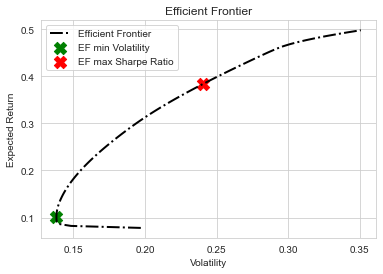

In [61]:
e.plot_efrontier()
e.plot_optimal_portfolios()

In [68]:
e.maximum_sharpe_ratio().round(5)

,Allocation
NTAP,0.07630
TXN,0.00000
WELL,0.15773
ORCL,0.00000
NOW,0.32604
TYL,0.00000
INTC,0.00000
PLNT,0.43993


In [65]:
e.minimum_volatility().round(5)

,Allocation
NTAP,0.00690
TXN,0.07462
WELL,0.42574
ORCL,0.20409
NOW,0.00000
TYL,0.25780
INTC,0.01131
PLNT,0.01953


In [69]:
e.properties(verbose=True)

----------------------------------------------------------------------
Optimised portfolio for Maximum Sharpe Ratio

Time window/frequency: 252
Risk free rate: 0.005
Expected annual Return: 0.383
Annual Volatility: 0.240
Sharpe Ratio: 1.575

Optimal weights:
                NTAP  TXN     WELL          ORCL       NOW           TYL  \
Allocation  0.076296  0.0  0.15773  3.886865e-17  0.326044  1.615461e-17   

                    INTC      PLNT  
Allocation  1.595132e-17  0.439931  
----------------------------------------------------------------------


(0.3833641863543243, 0.24023533766169905, 1.574973066148741)

In [ ]:
start2, end2 = datetime(2019,1,1), datetime(2019,12,31) #Periodo nuevo
portfolio_new = pd.DataFrame()
stocks_new = ['NTAP', 'TXN', 'WELL', 'ORCL', 'NOW', 'TYL', 'INTC', 'PLNT', '^GSPC']
for stock in stocks_new:
    load2 = yf.download(stock, start2, end2)
    portfolio_new[stock] = load2['Adj Close']

Exception in thread Thread-6:
Traceback (most recent call last):
  File "c:\users\josè valencia\appdata\local\programs\python\python38\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "c:\users\josè valencia\appdata\local\programs\python\python38\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "c:\users\josè valencia\appdata\local\programs\python\python38\lib\site-packages\multitasking\__init__.py", line 102, in _run_via_pool
    return callee(*args, **kwargs)
  File "c:\users\josè valencia\appdata\local\programs\python\python38\lib\site-packages\yfinance\multi.py", line 166, in _download_one_threaded
    data = _download_one(ticker, start, end, auto_adjust, back_adjust,
  File "c:\users\josè valencia\appdata\local\programs\python\python38\lib\site-packages\yfinance\multi.py", line 178, in _download_one
    return Ticker(ticker).history(period=period, interval=interval,
  File "c:\users\josè valencia\appdata\local\programs\

In [92]:
log2 = np.log(portfolio_new.iloc[:,:-1]/portfolio_new.iloc[:,:-1].shift(1)).dropna()

In [110]:
portfolio_new.head()

,NTAP,TXN,WELL,ORCL,NOW,TYL,INTC,PLNT,^GSPC
Date,,,,,,,,,
2018-12-31,56.807114,90.555443,64.823318,43.987263,178.050003,185.820007,45.307384,53.619999,2506.850098
2019-01-02,57.444969,90.507538,62.843414,44.055454,178.320007,182.240005,45.452202,53.580002,2510.030029
2019-01-03,55.087372,85.170029,64.001472,43.626789,169.119995,176.630005,42.951744,52.799999,2447.889893
2019-01-04,56.956203,89.022224,63.767990,45.507084,179.229996,180.160004,45.587357,54.919998,2531.939941
2019-01-07,56.668686,90.555443,64.524460,46.228024,186.669998,182.839996,45.799751,55.840000,2549.689941


In [163]:
e2 = finquant.efficient_frontier.EfficientFrontier(log2.mean(), log2.cov())


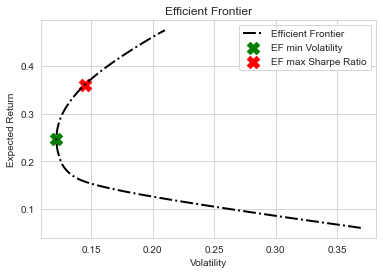

In [164]:
e2.plot_efrontier()
e2.plot_optimal_portfolios()

In [170]:
e2.minimum_volatility().round(4)

,Allocation
NTAP,0.0340
TXN,0.0000
WELL,0.4433
ORCL,0.1790
NOW,0.0000
TYL,0.1422
INTC,0.1350
PLNT,0.0665


In [166]:
e2.maximum_sharpe_ratio().round(4)

,Allocation
NTAP,0.0000
TXN,0.0399
WELL,0.2780
ORCL,0.0000
NOW,0.0000
TYL,0.5068
INTC,0.0969
PLNT,0.0784


In [108]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

In [150]:
ultimo_precio1 = get_latest_prices(portfolio_new.iloc[:,:-1])
ultimo_precio1

NTAP     60.323071
TXN     125.761673
WELL     79.005661
ORCL     52.218403
NOW     282.809998
TYL     298.359985
INTC     58.994587
PLNT     74.190002
Name: 2019-12-30 00:00:00, dtype: float64

In [173]:
dict(e2.minimum_volatility().round(4))

{'Allocation': NTAP    0.0340
 TXN     0.0000
 WELL    0.4433
 ORCL    0.1790
 NOW     0.0000
 TYL     0.1422
 INTC    0.1350
 PLNT    0.0665
 Name: Allocation, dtype: float64}

In [174]:
peso_max = {'NTAP'  :  0.0340,
 'TXN'   :  0.0000,
 'WELL'  :  0.4433,
 'ORCL'   : 0.1790,
 'NOW'     :0.0000,
 'TYL'   :  0.1422,
 'INTC'   : 0.1350,
 'PLNT'    :0.0665}
peso_max

{'NTAP': 0.034,
 'TXN': 0.0,
 'WELL': 0.4433,
 'ORCL': 0.179,
 'NOW': 0.0,
 'TYL': 0.1422,
 'INTC': 0.135,
 'PLNT': 0.0665}

In [168]:
allocation = DiscreteAllocation(peso_max, ultimo_precio1, total_portfolio_value=15000) # Inversiòn de $15k
activos, leftover = allocation.lp_portfolio()
print('Cartera agresiva, Cantidad de activos que deberìa comprar: ',activos)
print('Lo que me queda: ${:.2f}'.format( leftover))

3 out of 8 tickers were removed
Cartera agresiva, Cantidad de activos que deberìa comprar:  {'TXN': 5, 'WELL': 53, 'TYL': 25, 'INTC': 26, 'PLNT': 16}
Lo que me queda: $3.99


In [195]:
e2.properties(verbose=True)

----------------------------------------------------------------------
Optimised portfolio for Efficient Return

Time window/frequency: 252
Risk free rate: 0.005
Expected annual Return: 0.246
Annual Volatility: 0.122
Sharpe Ratio: 1.978

Optimal weights:
                NTAP  TXN      WELL      ORCL  NOW       TYL      INTC  \
Allocation  0.033979  0.0  0.443287  0.179029  0.0  0.142191  0.135007   

                PLNT  
Allocation  0.066507  
----------------------------------------------------------------------


(0.24599698934682618, 0.12185919555917755, 1.97766765356491)

In [175]:
e2.properties(verbose=True)

----------------------------------------------------------------------
Optimised portfolio for Minimum Volatility

Time window/frequency: 252
Risk free rate: 0.005
Expected annual Return: 0.246
Annual Volatility: 0.122
Sharpe Ratio: 1.978

Optimal weights:
                NTAP  TXN      WELL      ORCL  NOW       TYL      INTC  \
Allocation  0.033979  0.0  0.443287  0.179029  0.0  0.142191  0.135007   

                PLNT  
Allocation  0.066507  
----------------------------------------------------------------------


(0.24599698934682618, 0.12185919555917755, 1.97766765356491)

In [169]:
e2.properties(verbose=True)

----------------------------------------------------------------------
Optimised portfolio for Maximum Sharpe Ratio

Time window/frequency: 252
Risk free rate: 0.005
Expected annual Return: 0.361
Annual Volatility: 0.145
Sharpe Ratio: 2.454

Optimal weights:
                    NTAP       TXN      WELL          ORCL           NOW  \
Allocation  2.332835e-16  0.039889  0.278022  1.994736e-17  6.973944e-18   

                 TYL      INTC     PLNT  
Allocation  0.506817  0.096852  0.07842  
----------------------------------------------------------------------


(0.36055840269431694, 0.14489516095195992, 2.4539011541745177)

In [176]:
log3 =np.log(portfolio_new.iloc[:,-1]/portfolio_new.iloc[:,-1].shift(1)).dropna()

In [180]:
help(qs.stats.sharpe)

Help on function sharpe in module quantstats.stats:

sharpe(returns, rf=0.0, periods=252, annualize=True)
    calculates the sharpe ratio of access returns
    
    If rf is non-zero, you must specify periods.
    In this case, rf is assumed to be expressed in yearly (annualized) terms
    
    Args:
        * returns (Series, DataFrame): Input return series
        * rf (float): Risk-free rate expressed as a yearly (annualized) return
        * periods (int): Frequency of returns (252 for daily, 12 for monthly)
        * annualize: return annualize sharpe?



In [187]:
qs.stats.sharpe(log3, rf=0.005)

2.012209338428637

In [ ]:
start2, end2 = datetime(2019,1,1), datetime(2019,12,31) #Periodo considerado
portfolio = pd.DataFrame()
stocks = ['NTAP', 'TXN', 'WELL', 'ORCL', 'NOW', 'TYL', 'INTC', 'PLNT', '^GSPC']
for stock in stocks:
    load = yf.download(stock, start, end)
    portfolio[stock] = load['Adj Close']

In [43]:
spx= portfolio.iloc[:,-1]

In [190]:
pf = build_portfolio(data=portfolio)

In [191]:
pf.properties()

----------------------------------------------------------------------
Stocks: NTAP, TXN, WELL, ORCL, NOW, TYL, INTC, PLNT, ^GSPC
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 0.000
Portfolio Volatility: nan
Portfolio Sharpe Ratio: nan

Skewness:
   NTAP  TXN  WELL  ORCL  NOW  TYL  INTC  PLNT  ^GSPC
0   NaN  NaN   NaN   NaN  NaN  NaN   NaN   NaN    NaN

Kurtosis:
   NTAP  TXN  WELL  ORCL  NOW  TYL  INTC  PLNT  ^GSPC
0   NaN  NaN   NaN   NaN  NaN  NaN   NaN   NaN    NaN

Information:
   Allocation   Name
0    0.111111   NTAP
1    0.111111    TXN
2    0.111111   WELL
3    0.111111   ORCL
4    0.111111    NOW
5    0.111111    TYL
6    0.111111   INTC
7    0.111111   PLNT
8    0.111111  ^GSPC
----------------------------------------------------------------------


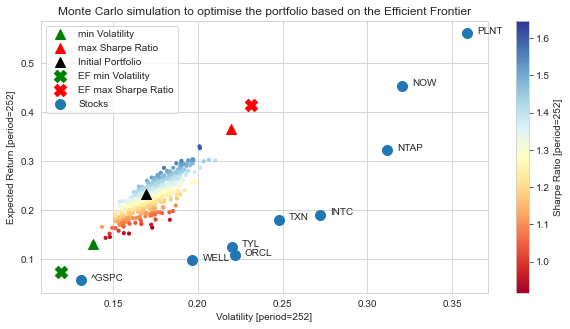

In [23]:
a1, b1 = pf.mc_optimisation(num_trials=500)
plt.figure(figsize=(10,5))
pf.mc_plot_results()
pf.ef_efficient_frontier()
pf.ef.plot_optimal_portfolios()
pf.plot_stocks()

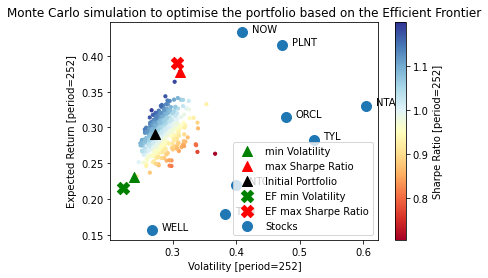

In [15]:
a, b = cartera.mc_optimisation(num_trials=500)
cartera.mc_plot_results()
cartera.ef_efficient_frontier()
cartera.ef.plot_optimal_portfolios()
cartera.plot_stocks()

In [178]:
import quantstats as qs
qs.extend_pandas()

In [31]:
activo = qs.utils.download_returns('TXN')

In [36]:
qs.stats.sharpe(portfolio.TXN)

0.7262036603831965

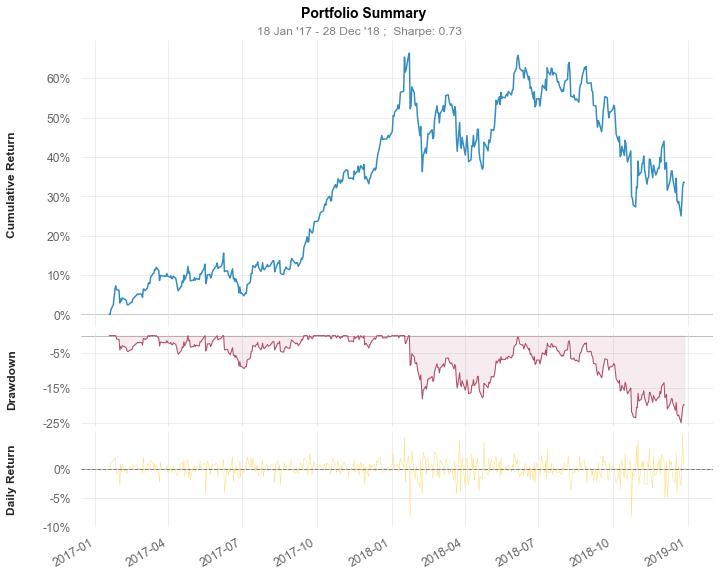

In [37]:
qs.plots.snapshot(portfolio.TXN)

In [63]:
qs.reports.metrics(portfolio.TXN, '^GSPC', mode='full')

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2017-01-19  2017-01-19
End Period                 2018-12-28  2018-12-28
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      100.0%

Cumulative Return          33.56%      9.41%
CAGR%                      16.09%      4.75%
Sharpe                     0.73        0.42
Sortino                    0.98        0.56
Max Drawdown               -24.87%     -19.78%
Longest DD Days            338         207
Volatility (ann.)          24.74%      13.07%
R^2                        0.48        0.48
Calmar                     0.65        0.24
Skew                       -0.74       -0.62
Kurtosis                   4.52        6.32

Expected Daily %           0.06%       0.02%
Expected Monthly %         1.21%       0.38%
Expected Yearly %          15.57%      4.6%
Kelly Criterion            2.35%       0.26%
Risk of Ruin               0.0%       

In [168]:
help(qs.reports.basic)

Help on function basic in module quantstats.reports:

basic(returns, benchmark=None, rf=0.0, grayscale=False, figsize=(8, 5), display=True, compounded=True)



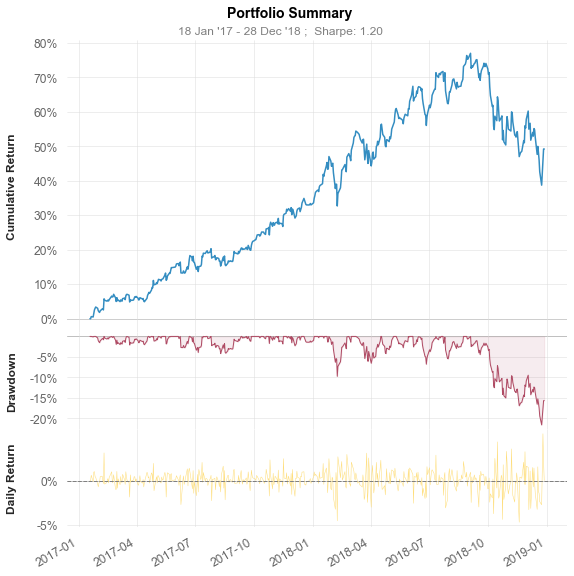

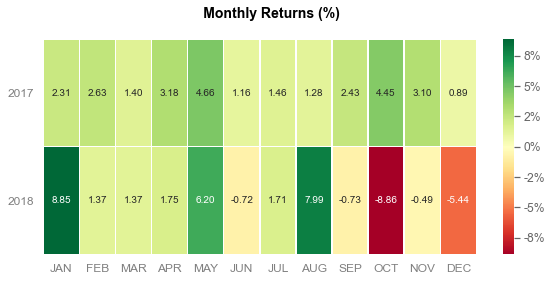

In [164]:
qs.reports.plots(suma, '^GSPC')

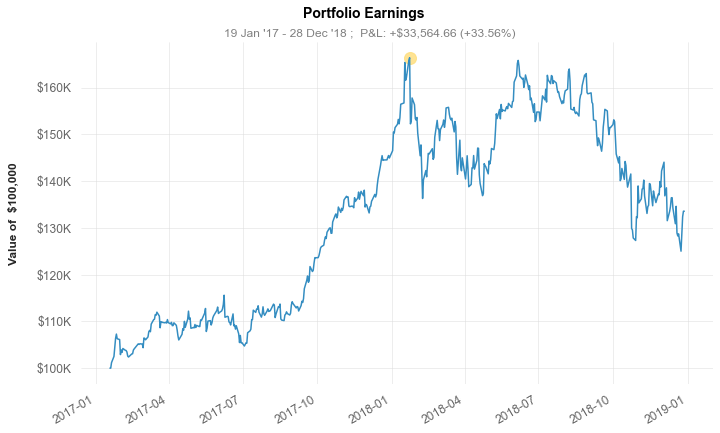

In [114]:
qs.plots.earnings(portfolio.TXN)

In [106]:
suma = portfolio.iloc[:,:-1].sum(axis=1)

In [108]:
portfolio.iloc[:,:-1].head()

,NTAP,TXN,WELL,ORCL,NOW,TYL,INTC,PLNT
Date,,,,,,,,
2017-01-19,33.076382,67.303925,55.649311,37.147236,82.699997,149.149994,33.490959,20.000000
2017-01-20,33.574879,68.096481,55.951027,37.772526,83.400002,148.820007,33.829800,20.030001
2017-01-23,33.390247,68.989265,56.722073,37.592514,83.250000,147.330002,33.674122,20.000000
2017-01-24,34.636497,70.219086,56.403591,37.990414,83.970001,147.479996,34.452557,20.510000
2017-01-25,35.033451,71.585571,55.615788,38.037796,86.360001,148.169998,34.617397,21.200001


In [107]:
suma.head()

Date
2017-01-19    478.517803
2017-01-20    481.474722
2017-01-23    480.948223
2017-01-24    485.662142
2017-01-25    490.620003
dtype: float64